In [ ]:
# sameer stud

In [1]:
import numpy as np
import pandas as pd
import statsmodels
# import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import yfinance as yf
import statsmodels.formula.api as sm

In [2]:
# Tickers_nifty = pd.read_csv("C:/Users/Sameer Kataria/Desktop/New folder/nifty50_tickers.csv")
# ticker_list = Tickers_nifty['Ticker'].to_list()
# ticker_list = [s + '.NS' for s in ticker_list]

In [3]:
Tickers_nyse = pd.read_csv("tickers_nyse.csv")
# ticker_list = Tickers_nifty['Ticker'].to_list()
# ticker_list = [s + '.NS' for s in ticker_list]

In [4]:
Tickers_nyse["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [5]:
health_data=Tickers_nyse[Tickers_nyse["Sector"]=="Energy"]

In [6]:
ticker_list=health_data.Symbol.values

In [7]:
df = yf.download(" ".join(ticker_list), start = "2022-01-31", end = "2022-03-20", interval="5m")["Adj Close"]

[*********************100%***********************]  21 of 21 completed


In [8]:
# df=df.dropna(how="all", axis=1)

# df=df[:-1]

# df.isna().sum()

In [9]:
# df=df[:-1]

In [10]:
df.isna().sum()

APA     0
BKR     0
COP     0
CTRA    0
CVX     0
DVN     0
EOG     0
FANG    0
HAL     0
HES     0
KMI     0
MPC     0
MRO     0
OKE     0
OXY     2
PSX     0
PXD     0
SLB     0
VLO     0
WMB     0
XOM     0
dtype: int64

In [11]:
data=df.dropna()

In [12]:
data=pd.DataFrame(data=data.values, columns=ticker_list)

In [13]:
# data=pd.DataFrame(data=data.values, columns=Tickers_nifty["Ticker"].values)

In [14]:
n = data.shape[1]
score_matrix = np.zeros((n, n))
pvalue_matrix = np.ones((n, n))
stock = data.columns

In [15]:
data

,APA,BKR,CVX,COP,CTRA,DVN,FANG,EOG,XOM,HAL,...,KMI,MRO,MPC,OXY,OKE,PSX,PXD,SLB,VLO,WMB
0,33.060001,26.900000,88.699997,21.580000,130.955002,50.974998,110.014999,127.635002,30.959999,90.500000,...,71.220001,19.660000,58.929100,37.410000,84.184998,213.552704,39.380001,81.239998,29.510000,74.830002
1,32.830002,26.770000,88.269997,21.540001,130.380005,50.688599,109.575500,127.760002,30.799999,90.129997,...,71.150002,19.519501,58.860001,37.139999,84.110001,213.330002,39.080002,80.989998,29.500000,74.669998
2,32.820000,26.775000,88.129997,21.459999,130.490005,50.435001,109.320000,127.539001,30.879999,89.849998,...,71.080002,19.450100,58.861301,37.110600,84.180000,212.360001,39.049999,81.040001,29.530001,75.129997
3,32.709999,26.719999,87.919998,21.330000,129.847794,50.220001,109.014999,126.989998,30.700001,89.419998,...,70.824997,19.360001,59.000000,36.970001,83.929901,212.589996,38.939999,80.580002,29.510000,74.839996
4,32.669998,26.700001,87.665001,21.158400,129.789993,50.146198,108.620003,126.315002,30.590000,89.330002,...,70.660004,19.325001,58.770100,36.820099,83.695000,211.630005,38.770000,80.320000,29.395000,74.754997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,39.180000,35.259998,99.970001,24.885000,159.960007,58.291000,115.870003,132.464996,36.080002,98.180000,...,78.029999,23.065001,66.860001,56.634998,78.331596,241.014999,39.825001,90.495003,31.440001,78.605003
2647,39.160000,35.285000,99.769997,24.946501,160.160004,58.153500,115.739998,132.300003,36.075001,98.059998,...,78.050003,23.115000,66.910004,56.494999,78.370003,240.660004,39.858002,90.360001,31.475000,78.739998
2648,39.020000,35.346500,99.599998,24.924999,160.360001,58.220001,115.169998,131.434998,35.959999,97.559998,...,78.029999,23.080000,66.910004,56.435001,78.519997,240.470001,39.755001,90.419998,31.485001,78.639999
2649,39.130001,35.369999,99.540001,24.860001,160.610001,58.270000,115.839996,131.419998,36.029999,97.410004,...,78.309998,23.080000,67.000000,56.240002,78.750000,239.899994,39.720001,90.430000,31.459999,78.610001


In [16]:
pairs = []
for i in range(n):
    for j in range(i+1, n):
        
        S1 = data[stock[i]]
        S2 = data[stock[j]]
        result = coint(S1, S2)
        score = result[0]
        pvalue = result[1]
        score_matrix[i, j] = score
        pvalue_matrix[i, j] = pvalue
        if pvalue < 0.05:
            pairs.append((stock[i], stock[j]))

In [17]:
# plt.figure(figsize=(10,8))
# sns.heatmap(score_matrix)

In [18]:
pd.DataFrame(pairs)

,0,1
0,APA,CVX
1,APA,FANG
2,BKR,XOM
3,CVX,FANG
4,CVX,MPC
5,COP,FANG
6,COP,MRO
7,COP,MPC
8,COP,VLO
9,CTRA,OXY


In [19]:
## a denotes score
## b is p values
## c is confidence interval
a,b,c=coint(data[pairs[1][0]], data[pairs[1][1]])

In [20]:
b

0.011829838525544227

In [25]:
##KOTAK AND HDFC SAMPLE CODE
model=sm.ols(formula= "{} ~ {}".format(pairs[2][1],pairs[2][0]), data=data).fit()

model.summary()

model.params

TS=data[pairs[2][1]]-model.params[pairs[2][0]]*data[pairs[2][0]]

In [26]:
# model=sm.ols(formula= "{} ~ {}".format(pairs[2][0],pairs[2][1]), data=data).fit()

# model.summary()

# model.params

# TS=data[pairs[2][0]]-model.params[pairs[2][1]]*data[pairs[2][1]]

In [27]:
X = TS.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.850022
p-value: 0.002435
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [28]:
TS[:5]

0    16.347275
1    16.257894
2    16.335178
3    16.185058
4    16.085921
dtype: float64

In [29]:
TS_test=TS[2000:].reset_index(drop=True)
TS=TS[:2000]

In [30]:
meanp=TS.mean()
sdp=TS.std()

No of instances it hits the sd line

In [31]:
dict_hits={}

In [32]:
for n in np.linspace(1,2,21):
    count=0
    for i in range(len(TS)-1):
        if (TS[i]<meanp-n*sdp) and (TS[i+1]>meanp-n*sdp):
            count+=1
        if (TS[i]>meanp-n*sdp) and (TS[i+1]<meanp-n*sdp):
            count+=1
        if (TS[i]<meanp+n*sdp) and (TS[i+1]>meanp+n*sdp):
            count+=1
        if (TS[i]>meanp+n*sdp) and (TS[i+1]<meanp+n*sdp):
            count+=1
        dict_hits[round(n,2)]=count
        
        

In [33]:
optim_hits=pd.DataFrame(dict_hits.values(),index=dict_hits.keys(), columns=["Hits"])
optim_hits.head()

,Hits
1.00,111
1.05,123
1.10,105
1.15,125
1.20,119


In [34]:
optim_hits.sort_values(["Hits"], ascending=False)

,Hits
1.15,125
1.05,123
1.20,119
1.00,111
1.25,111
1.10,105
1.30,77
1.35,67
1.40,55
1.50,52


In [35]:
optim_hits["Hits_filter"]=np.where(optim_hits.Hits>optim_hits.Hits.mean()+optim_hits.Hits.std(),1,0)

In [36]:
type_dev=optim_hits[optim_hits["Hits_filter"]==1].index.values
type_dev

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25])

Start

In [57]:
metrics_dict=[]
for n_dev in type_dev:


    sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

    posv=[]
    arrb=[]
    arrs=[]

    pos=0
    for i in range(len(TS)):
        if (TS[i]<=meanp-sdp*n_dev) & (TS[i]>=(meanp-sdp*n_dev)*(1-sl/3)):
            if pos==0:
                pos=1
                posv.append(pos)
                arrb.append(TS[i])

        if (TS[i]>=meanp+sdp*n_dev) & (TS[i]<=(meanp+sdp*n_dev)*(1+sl/3)):
            if pos==0:
                pos=-1
                posv.append(pos)
                arrb.append(TS[i])

        if TS[i]>=meanp:
            if pos==1:
                pos=0
                arrs.append(TS[i])
        if TS[i]<=meanp:
            if pos==-1:
                pos=0
                arrs.append(TS[i])

        if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
            if pos==1:
                pos=0
                arrs.append(TS[i])

        if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
            if pos==-1:
                pos=0
                arrs.append(TS[i])

    return_arr=[]

    for i in range(len(arrs)):
        if posv[i]==1:
            return_arr.append((arrs[i]-arrb[i])/arrb[i])
        if posv[i]==-1:
            return_arr.append((arrb[i]-arrs[i])/arrb[i])
    return_arr=np.array(return_arr)
    sharpe_ratio=return_arr.mean()/return_arr.std()
    ov_ret=(1+return_arr).cumprod()[-1]
    metrics_dict.append([n_dev,sharpe_ratio,ov_ret])

In [58]:
pd.DataFrame(metrics_dict, columns=["Dev", "Sharpe", "Overall_Ret"])

,Dev,Sharpe,Overall_Ret
0,1.00,0.373283,1.275991
1,1.05,0.425783,1.309612
2,1.10,0.592619,1.397074
3,1.15,0.917176,1.501784
4,1.20,1.220578,1.578356
5,1.25,1.098869,1.476775


End

In [59]:
n_dev=1.2

In [60]:
sl=(meanp-(meanp-n_dev*sdp))/((meanp-n_dev*sdp)*2)

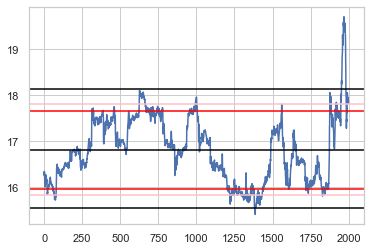

In [61]:
plt.plot(TS)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')

In [62]:
posv=[]
arrb=[]
arrs=[]

pos=0
for i in range(len(TS)):
    if (TS[i]<=meanp-sdp*n_dev) & (TS[i]>=(meanp-sdp*n_dev)*(1-sl/3)):
        if pos==0:
            pos=1
            posv.append(pos)
            arrb.append(TS[i])

    if (TS[i]>=meanp+sdp*n_dev) & (TS[i]<=(meanp+sdp*n_dev)*(1+sl/3)):
        if pos==0:
            pos=-1
            posv.append(pos)
            arrb.append(TS[i])

    if TS[i]>=meanp:
        if pos==1:
            pos=0
            arrs.append(TS[i])
    if TS[i]<=meanp:
        if pos==-1:
            pos=0
            arrs.append(TS[i])
            
    if TS[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrs.append(TS[i])
    
    if TS[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrs.append(TS[i])

In [63]:
return_arr=[]

for i in range(len(arrs)):
    if posv[i]==1:
        return_arr.append((arrs[i]-arrb[i])/arrb[i])
    if posv[i]==-1:
        return_arr.append((arrb[i]-arrs[i])/arrb[i])
        

In [64]:
(1+np.array(return_arr)).cumprod()

array([1.06092782, 1.11424949, 1.20333147, 1.26553513, 1.23320441,
       1.30965509, 1.38919145, 1.49436496, 1.6245166 , 1.57835586])

In [65]:
if len(arrb)==len(arrs):
    print(pd.DataFrame(data={"pos":posv, "buy/sell":arrb, "close":arrs, "profit/loss":return_arr}))
else:
    print(pd.DataFrame(data={"pos":posv[:-1], "buy/sell":arrb[:-1], "close":arrs, "profit/loss":return_arr} ))
        
    

   pos   buy/sell      close  profit/loss
0    1  15.853632  16.819559     0.060928
1   -1  17.702615  16.812891     0.050259
2   -1  17.670292  16.257588     0.079948
3   -1  17.684030  16.769892     0.051693
4    1  15.944345  15.537014    -0.025547
5    1  15.837866  16.819711     0.061994
6   -1  17.807611  16.726141     0.060731
7    1  15.959238  17.167487     0.075708
8    1  15.944753  17.333460     0.087095
9   -1  17.812717  18.318866    -0.028415


In [67]:
# pd.DataFrame(data={"pos":posv, "buy/sell":arrb, "close":arrs, "profit/loss":return_arr} )

O/S Testing

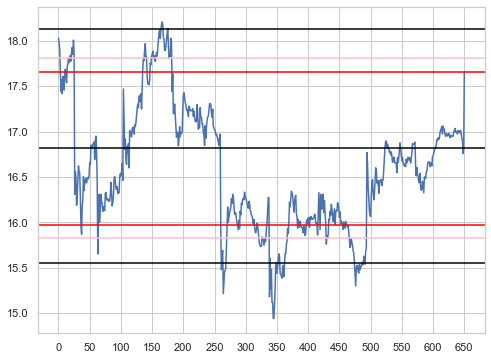

In [68]:
plt.figure(figsize=(8,6))
plt.plot(TS_test)
plt.axhline(TS.mean(), color='black')
plt.axhline(TS.mean()+n_dev*TS.std(), color='red')
plt.axhline(TS.mean()-n_dev*TS.std(), color='red')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl/3), color='pink')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl/3), color='pink')
plt.axhline((TS.mean()+n_dev*TS.std())*(1+sl), color='black')
plt.axhline((TS.mean()-n_dev*TS.std())*(1-sl), color='black')
plt.xticks(np.arange(min(range(len(TS_test))), max(range(len(TS_test)))+1, 50))
plt.show()

In [69]:
posvt=[]
arrbt=[]
arrst=[]

pos=0

In [70]:
for i in range(len(TS_test)):
    if (TS_test[i]<=meanp-sdp*n_dev) & (TS_test[i]>=(meanp-sdp*n_dev)*(1-sl/2)):
        if pos==0:
            pos=1
            posvt.append(pos)
            arrbt.append(TS_test[i])

    if (TS_test[i]>=meanp+sdp*n_dev) & (TS_test[i]<=(meanp+sdp*n_dev)*(1+sl/2)):
        if pos==0:
            pos=-1
            posvt.append(pos)
            arrbt.append(TS_test[i])

    if TS_test[i]>=meanp:
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    if TS_test[i]<=meanp:
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])
            
    if TS_test[i]<=(meanp-sdp*n_dev)*(1-sl):
        if pos==1:
            pos=0
            arrst.append(TS_test[i])
    
    if TS_test[i]>=(meanp+sdp*n_dev)*(1+sl):
        if pos==-1:
            pos=0
            arrst.append(TS_test[i])

In [71]:
return_arrt=[]

for i in range(len(arrst)):
    if posvt[i]==1:
        return_arrt.append((arrst[i]-arrbt[i])/arrbt[i])
    if posvt[i]==-1:
        return_arrt.append((arrbt[i]-arrst[i])/arrbt[i])
        

In [72]:
trade_log=pd.DataFrame(data={"pos":posvt, "buy/sell":arrbt, "close":arrst} )
trade_log

,pos,buy/sell,close
0,-1,17.665807,16.309896
1,1,15.965315,16.849887
2,-1,17.694648,18.177000
3,-1,17.807692,15.888401
4,1,15.967431,15.180738
5,1,15.792652,15.418915


In [73]:
pl_arr=[]
for i in range(len(trade_log)):
    if trade_log.pos[i]==-1:
        pl_arr.append((trade_log["buy/sell"][i]-trade_log["close"][i])/trade_log["buy/sell"][i])
    if trade_log.pos[i]==1:
        pl_arr.append((-trade_log["buy/sell"][i]+trade_log["close"][i])/trade_log["buy/sell"][i])

In [74]:
trade_log["profit_loss"]=pl_arr
trade_log

,pos,buy/sell,close,profit_loss
0,-1,17.665807,16.309896,0.076753
1,1,15.965315,16.849887,0.055406
2,-1,17.694648,18.177000,-0.027260
3,-1,17.807692,15.888401,0.107779
4,1,15.967431,15.180738,-0.049269
5,1,15.792652,15.418915,-0.023665


In [75]:
(1+trade_log.profit_loss).cumprod()

0    1.076753
1    1.136412
2    1.105434
3    1.224576
4    1.164243
5    1.136691
Name: profit_loss, dtype: float64